In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio
import torchvision
from torchsummary import summary

import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import pickle
import math

import models
import utils
import params
import transition_S

In [2]:
sine_array = np.arange(0, 10, step=0.01)
sine_array = list(map(lambda x: math.sin(x), sine_array))
sine_array = np.array([sine_array for _ in range(8)]) #(N, M)
sine_array = np.transpose(sine_array, (1,0))

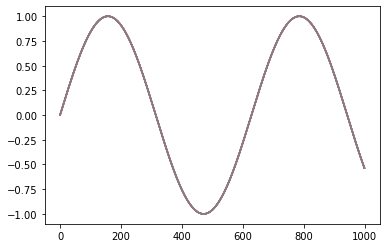

In [3]:
plt.plot(sine_array)
plt.show()

In [4]:
# 알고리즘으로 계산한 결과
sine_array = torch.Tensor(sine_array).unsqueeze(0)
sine_array.shape

torch.Size([1, 1000, 8])

In [5]:
algo_output = transition_S.Conv_S(sine_array)
algo_output.shape

torch.Size([1, 1000, 8])

In [6]:
#승진이가 작성한 output
import torch.nn.functional as F
BATCH_SIZE = 1

#transfer_f = torch.reshape(torch.arange(3*2*2),(3,2,2)).type(torch.float64)
transfer_f = torch.tensor(transition_S.S_data)
#_y = torch.reshape(torch.arange(BATCH_SIZE*3*2),(BATCH_SIZE,3,2)).type(torch.float64)
_y = sine_array.permute((0, 2, 1))
y = torch.cat((torch.zeros((BATCH_SIZE, 8, 8)).type(torch.float64),_y),dim=1).type(torch.float64)
_transfer_f = transfer_f.permute((2,1,0))
_y = y.permute((0,2,1))
y_p = F.conv1d(_y, _transfer_f).transpose(1,2)

RuntimeError: Expected object of scalar type double but got scalar type float for sequence element 1.

In [7]:
#transfer_f = torch.reshape(torch.arange(3*2*2),(3,2,2)).type(torch.float64)
transfer_f = torch.tensor(transition_S.S_data)
#_y = torch.reshape(torch.arange(BATCH_SIZE*3*2),(BATCH_SIZE,3,2)).type(torch.float64)
_y = sine_array.type(torch.float64)
y = torch.cat((torch.zeros((BATCH_SIZE,127,8)).type(torch.float64),_y),dim=1).type(torch.float64)
_transfer_f = transfer_f.permute((2,1,0))
_y = y.permute((0,2,1))
y_p = F.conv1d(_y, _transfer_f).transpose(1,2)

[]

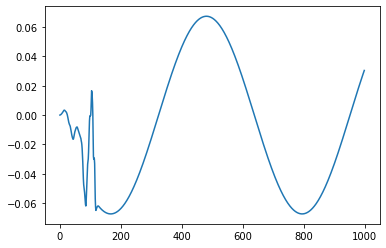

In [8]:
plt.plot(y_p.numpy()[0, :, 0])
plt.plot()

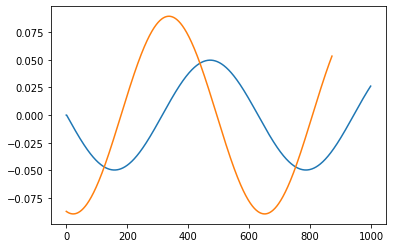

In [9]:
plt.plot(algo_output.numpy()[0, :, 0])
plt.plot(y_p.numpy()[0, 127:, 7])
plt.show()